Cas             Test/Méthode    p-value     Décision       Quantifieur

2 variables    Test de pearson    < 5%	      Pas 	       coefficient 
continues                                 indépendantes    de Pearson


2 variables      Test du khi2     < 5%	       Pas         V de Cramer
catégorielles                              indépendantes


variable          ANOVA           < 5%	       Pas 
catégorielle                               indépendantes
et continue

In [ ]:
#Analyse descriptive des variables numériques d'un jeu de données

#import package 
#------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd

data = pd.read_csv("crowdfunding.csv")
data.head()



#selection des df de tupe numerique 
#------------------------------------------------------------------------------------------
#data.columns
num_data = data.select_dtypes('number').copy()
num_data.head()
num_data = data.select_dtypes




#les indicateurs de position. 
#------------------------------------------------------------------------------------------
#Ils sont au nombre de cinq : 
#    moyenne, 
#    médiane, 
#    quantiles, 
#    min, 
#    max. 


# La moyenne 
#------------------------------------------------------------------------------------------
stats = pd.DataFrame (num_data.mean(),columns=['moyenne'])
stats.round(2)


# La mediane 
#------------------------------------------------------------------------------------------
# "la médiane est un indicateur plus précis pour une répartition précise des données

stats['median']= num_data.median()

# les quantiles 
#------------------------------------------------------------------------------------------
#Les quantiles sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données.
num_data['goal'].quantile(q= [0.25,0.5,0.75,1])


#les valeurs min max
#------------------------------------------------------------------------------------------
stats['min'] = num_data.min()
stats['max'] = num_data.max()



#indicateurs de dispersion
#------------------------------------------------------------------------------------------

#la variance : mesure la dispersion MAX autour de la moyenne
#[(1 - 2)2 + (2 - 2)2 + (3 - 2)2] ÷ 3 = 0,667

# l'écart-type :  mesure la dispersion pour l ensemble des points (des valeurs extremes ne serons pas convertes)



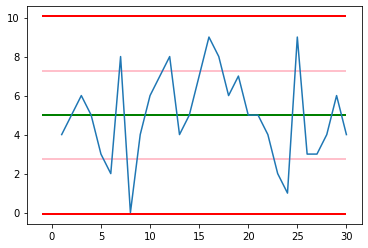

In [92]:
plt.plot ( df['nb travailleur'] )
plt.hlines (y = df['nb travailleur'].mean() + v,xmin=-1,xmax=30 , lw=2,color='red' )     #variance 
plt.hlines (y = df['nb travailleur'].mean() - v ,xmin=-1,xmax=30 , lw=2,color='red' )      #variance 
plt.hlines (y = df['nb travailleur'].mean() + e,xmin=-1,xmax=30 , lw=2,color='pink' )        #ecort type 
plt.hlines (y = df['nb travailleur'].mean() - e ,xmin=-1,xmax=30 , lw=2,color='pink' )      #ecort type 
plt.hlines (y = df['nb travailleur'].mean() ,xmin=-1,xmax=30 , lw=2,color='green' )      #mean 

In [ ]:
#Analyse descriptive des variables qualitatives d'un jeu de données 

#import 
#------------------------------------------------------------------------------------------
# Insérez votre code ici
import numpy as np
import pandas as pd 

data = pd.read_csv ('crowdfunding.csv')
data.head()


#recuperer les col string
#------------------------------------------------------------------------------------------
data.dtypes 
cat_data = data.select_dtypes(include = 'object')
cat_data.head()

#compter les values et les trier
#------------------------------------------------------------------------------------------
cat_data['main_category'].value_counts (ascending = False).iloc [:3]

#affiche la value la plus courante
#------------------------------------------------------------------------------------------
cat_data['main_category'].mode()

#% du nombre des differentes values dans le jeu
#------------------------------------------------------------------------------------------
cat_data['state'].value_counts(normalize=True)

#cree 1 col qui separe un ensemble de valeurs qunatitattif continues ene 4classes reparties  
#------------------------------------------------------------------------------------------
data['goal_classes'] = pd.qcut(data['goal'], labels=[0,1,2,3],q=4)


#fonction d aggregation group by 
#------------------------------------------------------------------------------------------
state_summary = data.groupby(['goal_classes','state']).agg({'goal':'sum'})

state_summary['backers']  = data.groupby(['goal_classes','state']).agg({'backers':'sum'})

target_goal = data.groupby('state').agg({'goal':['mean','median','min','max']})






In [ ]:
#Analyse des liaisons entre les variables d'un jeu de données


#import
#------------------------------------------------------------------------------------------
# Insérez votre code ici
import pandas as pd
import numpy as np

df = pd.read_csv('crowdfunding.csv')
df.head()

#liaison entre les vars :  le test de corrélation de Pearson var quantitatif
#------------------------------------------------------------------------------------------
#Dans le cas du test de corrélation de Pearson, l'hypothèse nulle est la suivante :
#H0: "Les deux variables testées sont indépendantes"
#Pour rejeter ou non cette hypothèse, on regarde la p-value du test
# Si cette dernière est en dessous de 5%, on rejette  H0 # correlation entre les var
    #pearsonr=cov(X,Y)σX∗σY
        #avec : 
    #cov(X,Y) est la covariance entre  X  et  YY
    #σX  l'écart type de  XX
    #σY  l'écart type de  Y
#scipy.stats.pearsonr permet de réaliser le test sur deux variables quantitatives. 
#Il renvoie le coefficient et la p-value du test.

from scipy.stats import pearsonr

df.head()

pd.DataFrame(pearsonr(df['backers'],df['pledged']),
             ['pearson_coeff','p-value'], ['resultat_test'])

#le coef pearson retourne une valeur de la correlation entre les var

#out :
#resultat_test
#pearson_coeff	0.803129
#p-value	0.000000


#Correlation valeur quantitatif
#------------------------------------------------------------------------------------------
df.corr()
#La matrice de corrélation déjà implémentée dans python renvoie un dataframe 
#contenant les coefficients de corrélation de pearson




#test du  χ2  par table de contingence pour 2 variables catégorielles 
#------------------------------------------------------------------------------------------
table = pd.crosstab(df['main_category'],df['state'])
table

#Pour ce test, on pose comme hypothèse nulle:
#H0 : "les variables maincategory et state sont indépendantes"

from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table)
statistique = resultats_test[0]
p_valeur = resultats_test[1]#
degre_liberte = resultats_test[2]

print(statistique,p_valeur,degre_liberte)
#retourne la statistique du test, la p-value, le degré de liberté
# Pour rejeter l'hypothèse nulle, il est nécessaire que la p-value soit inférieure à 5%

#mesure du niveau d intensite de la correlation : le V de Cramer corrigé
#pour 2 variables catégorielles
#------------------------------------------------------------------------------------------
#fonction definit et a appeler pour etre appliquée

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table,df.shape[0])





#étudier les relations entre variables quantitatives et qualitatives.
#analyse de la variance (ANOVA
#------------------------------------------------------------------------------------------
import statsmodels.api 
result = statsmodels.formula.api.ols('pledged ~ main_category', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)

#	df	sum_sq	mean_sq	F	PR(>F)
#main_category	14.0	1.334171e+12	9.529794e+10	5.668589	4.164877e-11
#Residual	9985.0	1.678636e+14	1.681158e+10	NaN	NaN

#la p-value (PR(>F)) est inférieur à 5% donc 
#on rejette l'hypothèse selon laquelle main_category n'influe pas sur pledged.

#------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------

In [ ]:
#exercice : 

#Une poule pond huit œufs. Voici les poids en grammes (g) des œufs :
#60 g, 56 g, 6l g, 68 g, 51 g, 53 g, 69 g, 54 g.

#Premièrement, calculez la moyenne :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

poid = [60 , 56 , 61 , 68 , 51 , 53 , 69 , 54 ]
df = pd.DataFrame ( poid, index = list (range (1,9)), columns = ['oeuf']  )


df['diff'] = df['oeuf'].apply(lambda x : np.abs(x -df.mean()) )

df['diff2'] = df['diff'] .apply(lambda x : x*x )

print (df['oeuf'].mean() + np.sqrt(df['diff2'].sum()/len( df['oeuf'] )) , df['oeuf'].mean() - np.sqrt(df['diff2'].sum()/len( df['oeuf'] ))   )
df['oeuf'].mean()

In [ ]:
plt.plot ( df['oeuf']   )
plt.hlines (y = 65,xmin=-1,xmax=10 , lw=2,color='red' )
plt.hlines (y = 52,xmin=-1,xmax=10 , lw=2,color='red' )
plt.hlines (y = df['oeuf'].mean() ,xmin=-1,xmax=10 , lw=2,color='red' )

Exemple 2 – Écart-type calculé à l'aide d'un tableau de fréquences
On a demandé à 30 fermiers combien de travailleurs agricoles ils embauchent durant des récoltes typiques. Voici leurs réponses :

4, 5, 6, 5, 3, 2, 8, 0, 4, 6, 7, 8, 4, 5, 7, 9, 8, 6, 7, 5, 5, 4, 2, 1, 9, 3, 3, 4, 6, 4


In [89]:
nb_trav = [4, 5, 6, 5, 3, 2, 8, 0, 4, 6, 7, 8, 4, 5, 7, 9, 8, 6, 7, 5, 5, 4, 2, 1, 9, 3, 3, 4, 6, 4]
df = pd.DataFrame ( [ nb_trav , list(range ( 1,31)) ]   , index = [ 'nb travailleur' , 'fermier nb' ] ).transpose ()
df = df.set_index ('fermier nb')

df['diff'] =  df['nb travailleur'].apply (lambda x : np.abs ( x - df['nb travailleur'].mean() ))
df['diff2'] =  df['diff'].apply (lambda x :  ( x *x ))

v =  df['diff2'].sum() /len (df['nb travailleur']  )
e = np.sqrt (v)
e

2.250925735484551

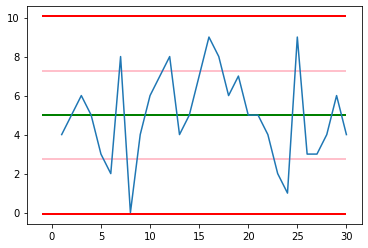

In [91]:
plt.plot ( df['nb travailleur'] )
plt.hlines (y = df['nb travailleur'].mean() + v,xmin=-1,xmax=30 , lw=2,color='red' )
plt.hlines (y = df['nb travailleur'].mean() - v ,xmin=-1,xmax=30 , lw=2,color='red' )
plt.hlines (y = df['nb travailleur'].mean() + e,xmin=-1,xmax=30 , lw=2,color='pink' )
plt.hlines (y = df['nb travailleur'].mean() - e ,xmin=-1,xmax=30 , lw=2,color='pink' )
plt.hlines (y = df['nb travailleur'].mean() ,xmin=-1,xmax=30 , lw=2,color='green' )

Exemple 3 – Écart-type des variables groupées (continues ou discrètes)
On a demandé à un groupe de 220 élèves de 10e année combien d'heures ils ont regardé la télévision chaque semaine. Leurs réponses ont été consignées dans le tableau ci-dessous. À l'aide de cette information, calculez la moyenne et l'écart-type des heures pendant lesquelles les 220 élèves ont regardé la télévision.

In [88]:
di = {

'h min': [10 ,15 ,20,25,30 ,35,40 ],
'h max' : [14,19,24, 29,34, 39,44], 
 'Nbre e' : [2 ,12,23,60,77,38,8]    
}


df =pd.DataFrame ( di)


df['creneau h'] = (df['h max'] - df['h min'] )
df['h mil'] = df['h min'] + (df['creneau h'] / 2) 
df

,h min,h max,Nbre e,creneau h,h mil
0,10,14,2,4,12.0
1,15,19,12,4,17.0
2,20,24,23,4,22.0
3,25,29,60,4,27.0
4,30,34,77,4,32.0
5,35,39,38,4,37.0
6,40,44,8,4,42.0
